In [2]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.feature import hog

In [10]:
useSymbols = ['1','2','3','4','5','6','7','8','9','0','+','-','times','forward_slash']
def symbolToUse(s):
    if s in useSymbols : 
        return True
    else : 
        return False

In [11]:
print (symbolToUse('-'))

True


In [12]:
img = cv2.imread("/home/mayank/extracted_images/1/1_29903.jpg")

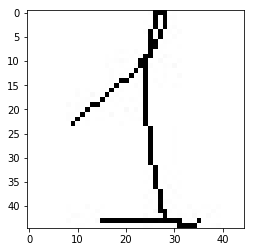

In [13]:
plt.imshow(img,cmap='gray')

In [14]:
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
img = cv2.dilate(img,(3,3))

In [15]:
temp = img

In [16]:
temp = cv2.GaussianBlur(temp,(5,5),0)
top = int(0.05 * temp.shape[0])  # shape[0] = rows
bottom = top
left = int(0.05 * temp.shape[1])  # shape[1] = cols
right = left
temp = cv2.copyMakeBorder(temp, top, bottom, left, right, cv2.BORDER_CONSTANT, None, [1,1,1])

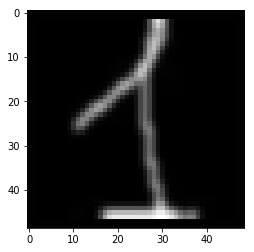

In [17]:
plt.imshow(temp,cmap='gray')

()

In [18]:
label = []
data = {}
list_of_images=[]
i = -1
noOfIter = 0
for x in os.listdir('/home/mayank/extracted_images/'):
    i = -1
    if((symbolToUse(x))) : 
#     if(True):
        noOfIter = noOfIter + 1
        print(noOfIter)
        for y in os.listdir('/home/mayank/extracted_images/' + str(x) ) :
            label.append(x)
            i = i + 1
            temp = cv2.imread('/home/mayank/extracted_images/' + str(x) + '/' + str(y) )
            temp = cv2.resize(temp,(45,45))
            temp = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
            temp = cv2.bitwise_not(temp)
            temp = cv2.dilate(temp,(3,3))
            top = int(0.05 * temp.shape[0])  # shape[0] = rows
            bottom = top
            left = int(0.05 * temp.shape[1])  # shape[1] = cols
            right = left
            temp = cv2.GaussianBlur(temp,(5,5),0)
            temp = cv2.copyMakeBorder(temp, top, bottom, left, right, cv2.BORDER_CONSTANT, None, [1,1,1])
#             npArray = np.concatenate(npArray,temp.flatten)
            list_of_images.append(temp)
            data[x] = temp
#             break
#         break
#     break

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [19]:
X = np.array(list_of_images)

In [20]:
y = np.array(label)

In [21]:
X.shape

(156816, 49, 49)

In [22]:
X_2 = X[:].reshape((X.shape[0],X.shape[1] ** 2))

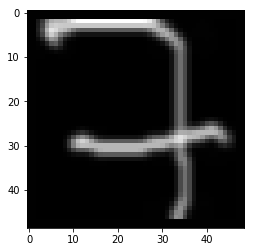

In [23]:
plt.imshow(X_2[32432].reshape((49,49)),cmap='gray')

In [24]:
y[32432]

'7'

In [21]:
import gist

In [27]:
img = cv2.cvtColor(X_2[32432].reshape(49,49),cv2.COLOR_GRAY2RGB)

In [28]:
img.shape

(49, 49, 3)

In [29]:
cv2.imwrite("NewImage.jpg",img)

True

In [25]:
desc = hog(img,pixels_per_cell = (5,5))

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [26]:
desc.shape

(3969,)

In [27]:
def extract_gist(array) : 
    img = array.reshape(49,49)
    desc = fd = hog(img,pixels_per_cell = (5,5))
    return desc

In [ ]:
X_2 = np.apply_along_axis(extract_gist,axis=1,arr = X_2)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [ ]:
print(X_2.shape,y.shape)

In [ ]:
import pickle

pickle_out = open("/media/mayank/3EB84489B844419F/datasets/Crohme_digits_symbols_pickle_hog/X.pickle","wb")
pickle.dump(X_2,pickle_out)
pickle_out.close()

pickle_out = open("/media/mayank/3EB84489B844419F/datasets/Crohme_digits_symbols_pickle_hog/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()